# Analisando a Violência no Rio de Janeiro



  A imagem do Rio de Janeiro tem uma profunda contradição entre a beleza natural e o caos humano, com o convívio lado a lado entre uma das sétimas maravilha do mundo e a maior favela do país, convivendo com a sensualidade do samba e do carnaval e o terror das imagens de chacinas de meninos de rua, de cadáveres transportados em carrinhos.

  <center><img alt="Rio de Janeiro" width="30%" src="https://raw.githubusercontent.com/inaepmachado/Portfolio/master/imagens/riodejaneiro.jpg"></center>
  
Segundo dados publicado pela Unesco com dados do ano 2000, a taxa de homicídios do Estado do Rio de Janeiro é a segunda do Brasil, após Pernambuco. No entando, a violência do estado é a mais visível, com tantas contradições coexistindo em um mesmo lugar, gerando impactos políticos, sociais e econômicos.
  O objetivo desse estudo é entender como está a criminalidade no estado do Rio de Janeiro e os tipos de violência que mais impactam.

## Obtenção dos Dados
Os dados foram obtidos do [portal ISPDados](http://www.ispdados.rj.gov.br/), uma página de dados abertos do Instituto de Segurança Pública do Rio de Janeiro. Nesta página, você poderá acessar as bases de dados de registros criminais e de atividade policial do estado do Rio de Janeiro. As informações divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Neste estudo iremos utilizar o `dataset.csv` disponível [neste link](https://raw.githubusercontent.com/inaepmachado/DataSet/master/violencia_rio.csv).

### Importando os dados

In [1]:
# importa os pacotes necessários e arquivo a ser estudado

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/inaepmachado/DataSet/master/violencia_rio.csv')

## Análise Inicial dos Dados

Para iniciar nosso estudo, precisamos saber como é o `dataset` que iremos trabalhar, o tamanho da base e quantidade de variáveis temos disponíveis.

In [2]:
# verificar o tamanho da base e quantas variáveis temos disponíveis
print("# de Registros (tamanho da base):   ", df.shape[0])
print("# de Variáveis (tipo de informação): ", df.shape[1])

# de Registros (tamanho da base):    344
# de Variáveis (tipo de informação):  56


Também é importante saber quais informações temos na base de dados, quais são os campos existentes que teremos disponíveis para estudar, e qual é o tipo de informação, se é numérico, texto etc.

In [3]:
# nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [4]:
# tipo dos dados
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Qual é a "cara" da nossa base de dados? Mesmo lendo a documentação dos dados que estão sendo disponibilizados, precisamos ver como os dados estão sendo apresentados, como eles aparecem na base de dados.
Essa visualização não exclui algumas análises posteriores, onde irá depender do que temos de variável disponível: nesse caso, as principais análises são identificar qual histórico temos disponíveis e quantificar missings de cada variável.

In [5]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [6]:
# identificar o histórico disponível
print(df.vano.unique())

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]


In [7]:
# identifica o percentual de missings na base em cada variável - como temos 56 variáveis, é interessante mostrar os dados ordenados pelo alto volume de dados faltantes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Temos um longo histórico e algumas variáveis possuem alto volume de dados faltantes. Isso pode acontecer em função desse longo histórico, nem todos os crimes eram armazenados, então talvez a limpeza deva ocorrer considerando o período que mais apresenta informação consistente.

Para identificar isso é importante quantificar para cada variável com alto percentual de missings uma visão anual, para que saibamos a partir de quando existem dados que podemos trabalhar.

In [8]:
df.set_index('vano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1992,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1993,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1994,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1995,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1996,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1997,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1998,0,0,12,0,0,0,0,12,0,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1999,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,0,12,12,12,0,12,12,12,0,12,12,12,12,0,12,0,12,12,12,0,0,0,0,0


## Informações Estatísticas da Violência no Rio de Janeiro

Como próximo passo do entendimento da nossa base de dados é identificar como está a distribuição dos dados, se há outliers que podem influenciar nas conclusões. Caso haja problema na distribuição das variáveis, precisamos limpar e, assim, chegar a conclusões que façam mais sentido.

Iremos escolher algumas variáveis para estudar:

1) Crimes contra veículos: roubo, furto e recuperação de veículos
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

2) Crimes contra a vida: homicídio doloso

Esses dois crimes são os que tiveram maior incidência em 2019, vamos ver como eles evoluíram ao longo do tempo.

In [9]:
# distribuição das variáveis
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crime contra veículos

Faremos uma visão rápida e muito efetiva para entender como os crimes contra veículos aconteceram ao longo do tempo.
Temos informações de Furto, Roubo e Recuperação de veículos, o que nos dará uma ótima idéia do quanto das perdas (roubo e furto) foram recuperadas desde que os registros oficiais começaram a existir.

In [10]:
# média de roubo, furto e recuperação
print("Média de roubos mensal:      ", (round(df.roubo_veiculo.mean(), 2)))
print("Média de furtos mensal:      ", (round(df.furto_veiculos.mean(), 2)))

# identificando o percentual que é recuperado do total de perdidos: roubo + furto
total_perdido = (round(df.roubo_veiculo.mean(), 2)) + (round(df.furto_veiculos.mean(), 2))
print("Média de veículos perdidos:  ", total_perdido)
print("Média de Recuperação mensal: ", (round(df.recuperacao_veiculos.mean(), 2)))

perc_recuperados = (round(df.recuperacao_veiculos.mean(), 2)) / total_perdido * 100

print("\n{:.2f}% dos veículos roubados ou furtados foram recuperados.".format(perc_recuperados))

Média de roubos mensal:       2448.7
Média de furtos mensal:       1674.67
Média de veículos perdidos:   4123.37
Média de Recuperação mensal:  1772.24

42.98% dos veículos roubados ou furtados foram recuperados.


### Crimes contra a vida

Nesta visão, vamos ver como foi o comportamento do Homicídio Doloso ao longo dos anos. Houve aumento ou diminuição com o passar dos anos? Claro que faremos uma análise simples, para identificarmos no detalhe, precisaremos aprofundar mês a mês.

In [11]:
# identifica o menor e maior valor de homicídio doloso que ocorreram ao longo dos anos
print("Menor valor:\t{}".format(df.hom_doloso.min()))
print("Maior valor:\t{}".format(df.hom_doloso.max()))

Menor valor:	272
Maior valor:	831


A menor quantidade de homicídio doloso que ocorreu foi 272, enquanto que a maior foi de 831 casos.
E quais meses esses casos correram?

In [12]:
# identificando as datas que ocorreram no menor volume de homicício doloso
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [13]:
# identificando as datas que ocorreram no maior volume de homicício doloso
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


A data do maior volume de homicídio doloso que ocorreu foi em janeiro/1995, enquanto que o menor volume foi em junho/2015.
A princípio, de um ano para o outro tivemos um redução considerável do número de homicídios, porém não conseguimos dizer se essa redução foi ao longo dos meses e anos ou somente comparando os dois anos isolados. Para afirmar que ocorreu redução, precisamos analisar detalhadamente mês a mês.

## Visualização de Dados

A análise gráfica pode ser uma ferramenta poderosa para identificarmos o comportamento das nossas variáveis em estudo `roubo_veiculo`, `furto_veiculos`, `recuperacao_veiculos`, `hom_doloso`.

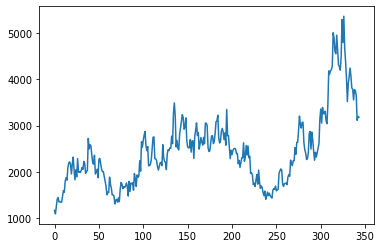

In [14]:
# plotar o gráfico de linha para todos os roubos e furtos de veículos.
df.roubo_veiculo.plot();

Analisando o roubo de veículos ao longo dos meses/anos, visualmente parecce que a maior parte do tempo o volume ficou em uma média de 3 mil casos/mês, exceto a partir de dez/2015 (valor 300 do eixo X), onde é percebido um aumento progressivo até aproximadamente jan/2018 (valor 325 do eixo X), com novo comportamento de queda até ago/2019.
Essa análise mensal é fundamental para entender se, de fato, está havendo melhora ou não do indicador.

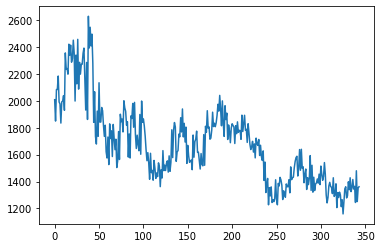

In [15]:
# plotar o gráfico de linha para todos os roubos e furtos de veículos.
df.furto_veiculos.plot();

Já a variável de furto de veículos apresenta uma queda constante, apresentando em alguns períodos comportamento flat, sem aumento ou queda.

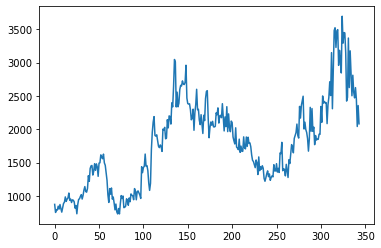

In [16]:
# plotar o gráfico de linha para recuperação de veículos.
df.recuperacao_veiculos.plot();

No caso de recuperação de veículos, temos uma oscilação em conjuntos de meses. Entre o mês abr/1999 e jun/2003, e out/2011 e jan/18 obsrvamos crescimento acentuado na recuperação de veículos, com queda dessas recuperações nos demais períodos.

Mas será que existem alguma relação entre os três indicadores?

In [17]:
corr = df[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].corr()

# mostrar a matriz de correlação
display(corr)

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
roubo_veiculo,1.000000,-0.312560,0.888298
furto_veiculos,-0.312560,1.000000,-0.463381
recuperacao_veiculos,0.888298,-0.463381,1.000000


Analisando a correlação entre elas, podemos ver uma forte correlação entre o roubo de veículos e a recuperação (0,88), mas uma baixa correlação negativa entre furto de veículos e recuperação (0,46). Ou seja, podemos dizer que mesmo que haja aumento no número de roubos, a recuperação do mesmo também tende a aumentar.

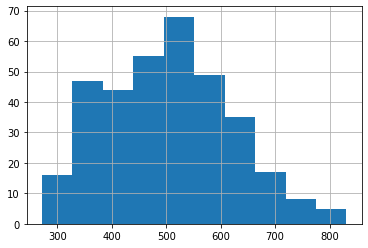

In [18]:
# analisando graficamente da variável de homicídios dolosos.
df.hom_doloso.hist();

Para homicídios dolosos, o gráfico acima nos dá algumas informações:

* Houveram, aproximadamente, 5 meses onde os valores atingiram o ápice, na casa de 800 registros por mês;
* Aproximadamente durante 70 meses tiveram entre 500 e 550 registros mensais de homicídio doloso;
* Os menores valores de homicídio também tiveram baixa frequência, aproximadamente 15 meses tiveram entre 250 e 350 casos/mês.


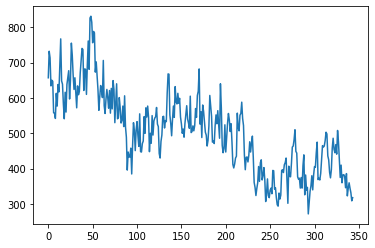

In [19]:
df.hom_doloso.plot();

Na visão do comportamento ao longo dos meses, o volume de homicídios dolosos apresenta uma queda constante, apresentando em alguns períodos comportamento flat, sem aumento ou queda.
Além disso, conseguimos ver que os menores valores relatados acima, apesar de terem baixa frequência, eles estão em períodos mais recentes, mostrando uma melhora no indicador ao longo do tempo. E a alta frequencia dos valores entre 500 e 550 é no maior período onde observamos uma curva flat, entre abr/1999 e set/2009.

## Conclusão

* Apesar de termos uma base de dados para analisar com muitos dados faltantes, isso veio se alterando os longo dos anos, onde conseguimos ter uma ótima visão dos indicadores a partir do ano 2000.

* O cenário de roubo/furto de veículos vem em uma crescente melhora nos meses de 2019, assim como a recuperação dos carros roubados. Aqui, se conseguirmos fazer uma análise mais detalhada com as regiões mais afetadas, por exemplo, conseguimos influenciar políticas públicas de segurança, dando mais atenção a determinadas regiões e mantendo em patamares baixos as que possuem melhor desempenho. Será possível ter um maior controle dessa situação, colocando todos 
os lugares em par de igualdade de desempenho.

* O cenário de homicídio doloso também vem apresentando uma melhora constante, e aqui também cabe aprofundar o estudo por tipo de região, assim como também dados demográficos das vítimas, visando políticas públicas voltadas para o público que mais sofre esse tipo de violência.

* Por fim, conseguir agregar essas informações mais específicas e detalhadas nos estudos, mesmo que o histórico seja mais recente, é de extrema importância para influenciar e melhorar toda decisão de política pública que se queira fazer, otimizando os investimentos onde mais tem necessidade e readequando a igualdade no combate de qualquer violência nas regiões do estado do Rio de Janeiro.